# Analysis of Extracted Data

### Importing the CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweet_df=pd.read_csv('twitter_data.csv')

In [3]:
tweet_df.head()

Unnamed: 0          UserID             Name  \
0           0      5125_uttam    UTTAM SALUNKE   
1           1  Sangeeta_IND92  Sangeeta Tiwari   
2           2  profpicturebot              Bot   
3           3  Sangeeta_IND92  Sangeeta Tiwari   
4           4  Sangeeta_IND92  Sangeeta Tiwari   

                                               Tweet  \
0  @VanchitRuttank: #HarGharTiranga \nहा राष्ट्री...   
1  @AbhishektiBJP: #HarGharTiranga ....तिरंगा हमा...   
2  @AbhishektiBJP: #NewProfilePic\n"तिरंगा हमें ज...   
3  @AbhishektiBJP: #NewProfilePic\n"तिरंगा हमें ज...   
4  @AbhishektiBJP: भारत के राष्ट्रीय ध्वज के रचना...   

                                        Mentions                 Created At  \
0  ['वंचित वृत्तांक अधिकृत', 'Prakash Ambedkar']  2022-09-02 19:00:51+00:00   
1                            ['Abhishek Tiwari']  2022-09-02 18:57:07+00:00   
2                            ['Abhishek Tiwari']  2022-09-02 18:57:04+00:00   
3                            ['Abhishek Tiwari']  2022-09-02 18:57:01+00:00   
4                            ['Abhishek Tiwari']  2022-09-02 18:56:50+00:00   

   Retweet  Likes  Location  
0        1      0       NaN  
1        1      0       NaN  
2        1      0  location  
3        1      0       NaN  
4        1      0       NaN

In [4]:
tweet_df["UserID"].value_counts()

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
                   ... 
sandeep30766558       1
Aaaaaaa48043398       1
onlyiffat             1
rpfpchgyd             1
BharatPhonde5         1
Name: UserID, Length: 12253, dtype: int64

In [14]:
top_mentions=tweet_df["Mentions"].value_counts()[:10]
top_mentions

['Narendra Modi']                     2609
['NYKS India']                        1932
[]                                    1672
['Dera Sacha Sauda']                   901
['Amrit Mahotsav']                     814
['Pawan Kalyan', 'Amrit Mahotsav']     489
['SMG Haryana']                        448
['Mahesh Babu']                        432
['Bhāratvarṣam']                       399
['Blue Chip']                          365
Name: Mentions, dtype: int64

In [6]:
tweet_df["Retweet"].value_counts()

1    33680
0     2267
Name: Retweet, dtype: int64

In [7]:
topUsers=tweet_df["UserID"].value_counts()[:10]
topUsers

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
RahulVerma1971      504
nyks_doda           488
therkmalviya        473
nykkinnaur          399
JammuNehru          363
Name: UserID, dtype: int64

### Visualizing Data

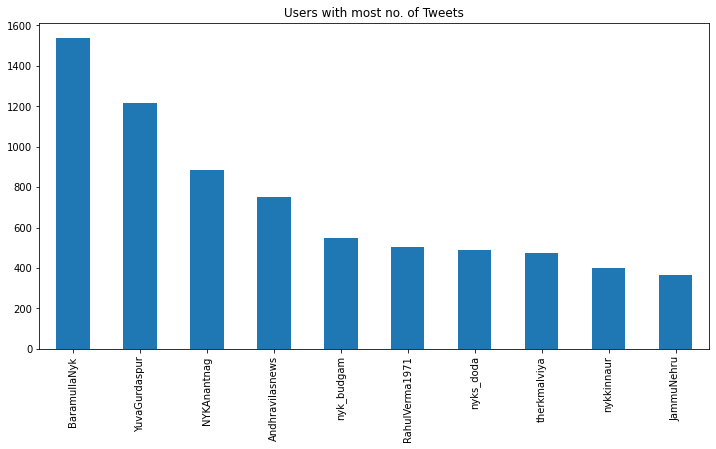

In [8]:
plt.figure(figsize=(12,6))
topUsers.plot.bar();
plt.title("Users with most no. of Tweets")
plt.show()

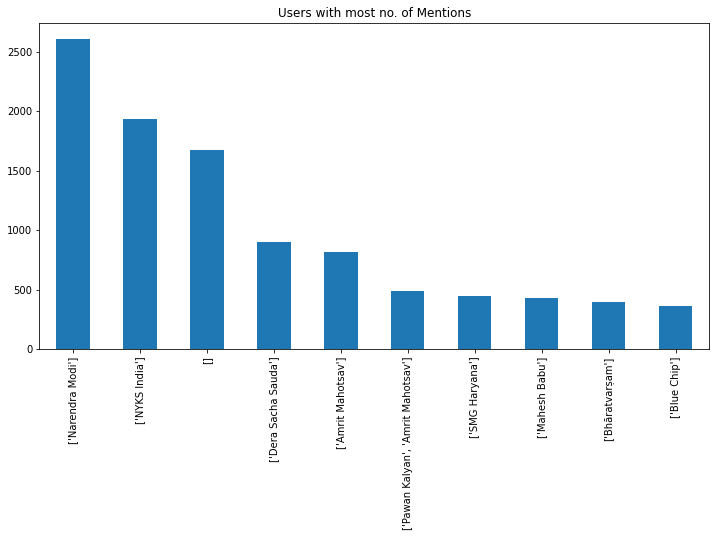

In [15]:
plt.figure(figsize=(12,6))
top_mentions.plot.bar();
plt.title("Users with most no. of Mentions")
plt.show()

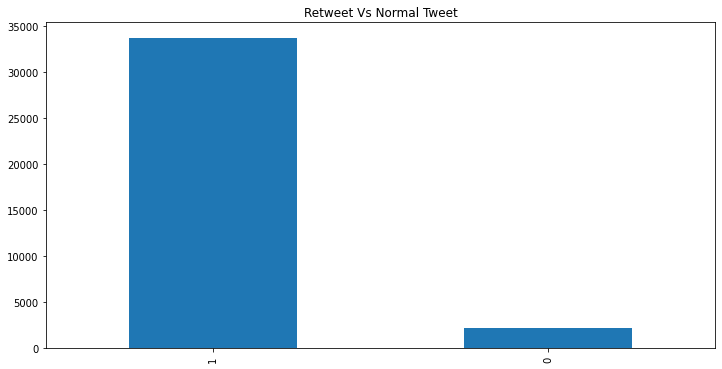

In [9]:
rtVsT=tweet_df["Retweet"].value_counts()
plt.figure(figsize=(12,6))
rtVsT.plot.bar();
plt.title("Retweet Vs Normal Tweet")
plt.show()

### Using NetworkX

In [10]:
import networkx as nx

In [31]:
G = nx.Graph()

In [36]:
NODES=list(set(tweet_df["UserID"]))
len(NODES)

12253

In [37]:
G.add_nodes_from(NODES)

In [41]:
tweet_df.iloc[0]["Mentions"][1:-1].split(',')[0][1:-1]

'वंचित वृत्तांक अधिकृत'

In [48]:
EDGES=[]

for i in range(tweet_df.shape[0]):
    temp_edges=[]
    tweeted_user=tweet_df.iloc[i]["UserID"]
    mentions=tweet_df.iloc[i]["Mentions"][1:-1].split(',')
    for m in mentions:
        temp_edges.append((tweeted_user,m[1:-1]))
    EDGES.extend(temp_edges)

In [49]:
EDGES

[('5125_uttam', 'वंचित वृत्तांक अधिकृत'),
 ('5125_uttam', "'Prakash Ambedkar"),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('profpicturebot', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', "'NAMO App Virtual Meet"),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', "'Hanshraj Vishwakarma"),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', 'Abhishek Tiwari'),
 ('Sangeeta_IND92', "'BJP Mumbai"),
 ('ImranAl14489033', 'SaraAli118706999'),
 ('BKChauhan_', 'Ratnakar'),
 ('Chinmay84654461', 'Smriti Z Irani'),
 ('Chinmay84654461', "'M Venkaiah Naidu"),
 ('Sudhirk75770572', 'UNNAO POLICE'),
 ('Sudhirk75770572', 'Jhansi Police'),
 ('Sudhirk75770572', 'Raebareli Police'),
 ('urstruly_235', 'Mahesh Babu'),
 ('urstruly_235', 'Mahesh Babu'),
 ('iNishan